In [1]:
import pandas as pd 
import re

In [2]:
df = pd.read_csv("data/ReviewsDATA.csv")

In [3]:
df.head()

,Unnamed: 0,reviews
0,0,"✅ Trip Verified | I had only 1 bag with me, ..."
1,1,✅ Trip Verified | Check in and security at T5 ...
2,2,Not Verified | LHR T5 BA Gold Wing worked wel...
3,3,Not Verified | Very good service on this rout...
4,4,✅ Trip Verified | Flight mainly let down by ...


In [4]:
df.columns

Index(['Unnamed: 0', 'reviews'], dtype='object')

In [5]:
df.drop("Unnamed: 0",axis = 1,inplace = True)

In [6]:
df.sample()

,reviews
8,✅ Trip Verified | This time British Airways ...


In [7]:
s = df['reviews']
s[0]

'✅ Trip Verified |\xa0 \xa0I had only 1 bag with me, a carry on trolley. Everyone one in boarding group 3 & 4 were forced to check-in their trolley carry-ons. They asked to take out any laptops, batteries, etc.... The woman at the boarding gate was very rude to me as I was explaining to her that this was my only bag and had nowhere to carry my laptop or other stuff that I need onboard. I tried to explain to her that the bag will not withstand being carried in the hold as it is fragile and showed her a crack from the one time I checked it in before. The bag was visibly small complying with the carry-on bag measurements.'

In [8]:
df.sample()

,reviews
1779,✅ Verified Review | Naples to Gatwick. I used...


In [9]:
ver = "✅"
l =[]
arr = df['reviews']
for i in arr:
    if ver in i:
        l.append(1)
    else:
        l.append(0)
        
df['verified trip'] = l

In [10]:
df.sample(10)

,reviews,verified trip
2035,"✅ Verified Review | Filthy dirty, tired Boein...",1
316,✅ Trip Verified | Terrible Experience with Bri...,1
817,Not Verified | I booked a flight with them on...,0
1505,✅ Trip Verified | Singapore to Heathrow. I ski...,1
17,Not Verified | Very good flight following an ...,0
251,✅ Trip Verified | The customer services (call ...,1
1473,✅ Trip Verified | The air conditioning didn’t ...,1
1453,✅ Trip Verified | Venice to Gatwick. I use Sno...,1
344,✅ Trip Verified | The airline lost my luggage...,1
1847,✅ Verified Review | Booked Gatwick to Lima re...,1


In [11]:
s = "❎"
ord(s)

10062

In [12]:
#df['reviews'] = rr

In [13]:
df.sample(5)

,reviews,verified trip
1363,✅ Trip Verified | I thought it time BA deserv...,1
1859,✅ Verified Review | London Heathrow to Seoul ...,1
1098,✅ Trip Verified | London Heathrow to Dubai. L...,1
764,Not Verified | The airline cancelled my initi...,0
1275,✅ Trip Verified | London to Lyon. The flight ...,1


In [14]:
import re
ptn = r'([\D]+ \|)'
r = df['reviews']
l = []
for i in r:
    #re.search(ptn,i)
    ll = re.findall(ptn,i)
    l.append(ll)

In [15]:
print(l[200:220])

[['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['Not Verified |'], ['✅ Trip Verified |'], ['Not Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['Not Verified |'], ['✅ Trip Verified |'], ['Not Verified |'], ['cNot Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |'], ['✅ Trip Verified |']]


In [16]:
rep = []
for i in r:
    i = re.sub(ptn,'',i)
    i.strip()
    rep.append(i)

In [17]:
print(len(rep))

2250


In [18]:
df['reviews'] = rep

In [19]:
df

,reviews,verified trip
0,"I had only 1 bag with me, a carry on trolle...",1
1,Check in and security at T5 quick. Both Galle...,1
2,LHR T5 BA Gold Wing worked well. Pleasant ch...,0
3,Very good service on this route BA2710 30th ...,0
4,Flight mainly let down by a disagreeable fl...,1
...,...,...
2245,We'd booked to fly Club World 4 months ago. ...,1
2246,Our flight from London to Boston was okay. Dis...,0
2247,London Gatwick to Valencia with British Airway...,0
2248,London to Seville via Madrid. If you want budg...,0


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
'''plt.figure(figsize=(5,4))
p = sns.countplot(x = 'verified trip',data = df,palette = 'flare',hue = 'verified trip',legend = False)
for i in p.containers:
    p.bar_label(i)
plt.show()'''

"plt.figure(figsize=(5,4))\np = sns.countplot(x = 'verified trip',data = df,palette = 'flare',hue = 'verified trip',legend = False)\nfor i in p.containers:\n    p.bar_label(i)\nplt.show()"

In [22]:
df['reviews'][8]

'\xa0 \xa0This time British Airways managed to get everything right. The price of the tickets was reasonable and the timing was perfect. Boarding was smooth and the seats were comfortable – easy reline to enable dozing and sufficient pitch to get in and out. The table was firm enough to allow the use of a small laptop and mouse. A pre-flight soft drink or Prosecco was offered and both the food and drink were more than sufficient. The best part was the cabin crew – two in PE and they were both extremely efficient, pleasant and witty. There was a good selection of movies and both the screen and the headset worked perfectly.'

In [23]:
s = '\xa0 \xa0'
s

'\xa0 \xa0'

In [24]:
r = df['reviews']
l = []
s = '\xa0 \xa0'
for i in r:
    i = re.sub(s,'',i)
    i = re.sub('\n','',i)
    i = re.sub('\r','',i)
    i.strip()
    l.append(i)

In [25]:
len(l)

2250

In [26]:
df['reviews'] = l

In [27]:
df['reviews'][516]

'  I’ve generally been a loyal Gold status flyer with BA if they fly the route I’m after but my recent flight to Nairobi was about as abysmal as you can get. We should have departed at 10:20 but after continuous delays finally left 4.5 hours late, not ideal when you’ve then got an 8hr + flight. Staff informed us virtually as we took off that the meal and drinks service would be started and completed asap as they needed to get rest because of hours we had been delayed. They couldn’t get it out and away quickly enough. That was then basically the last you saw of them until they came around an hour or so before landing. I sincerely hope they enjoyed their rest because when you pay full fare for business class service you actually expect a service. They were all extremely miserable and clearly didn’t want to be on board. We’re still waiting for you to pay our compensation that has been awarded to us by the official ombudsman in July for the cancellation of our flight to Miami in March. Thi

In [28]:
#df.to_csv('data/BA_Cleaned_review.csv')

In [29]:
df.isna().sum()

reviews          0
verified trip    0
dtype: int64

# Sentiment Analysis(using vaderSentiment)

In [30]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer#SIA
analyzer = SentimentIntensityAnalyzer()

rev = df['reviews']
sen_lst =[]
sc = []
sentis =['very-positive','positive','neutral','negative','very-negative']
for text in rev:
    scores = analyzer.polarity_scores(text) 
    overall_sc = scores['compound']
    sc.append(overall_sc)
    if overall_sc < -0.5:
        sen_lst.append(sentis[-1])        
    elif overall_sc >= -0.5 and overall_sc < 0:
        sen_lst.append(sentis[-2])
    elif overall_sc > 0 and overall_sc <= 0.5:
        sen_lst.append(sentis[-4])
    elif overall_sc > 0.5:
        sen_lst.append(sentis[-5])
    elif overall_sc == 0:
        sen_lst.append(sentis[-3])

In [42]:
sen_lst2 = [] 
for text in rev:
    scores = analyzer.polarity_scores(text) 
    overall_sc = scores['compound']
    if overall_sc < 0:
        sen_lst2.append('Negative')        
    elif overall_sc > 0:
        sen_lst2.append('Positive')
    elif overall_sc == 0:
        sen_lst2.append('Neutral')

In [43]:
df['sentiments'] = sen_lst

In [45]:
df['General_sentiments'] =sen_lst2

In [32]:
#del df['senti-score']

In [33]:
#df['senti-score'] = sc

In [46]:
df.sample(10)

,reviews,verified trip,sentiments,General_sentiments
1169,London Heathrow to Madrid. I travel from LHR ...,1,very-positive,Positive
1747,British Airways is quickly becoming a low qu...,1,negative,Negative
1247,Our flight from Seattle to London in Novembe...,1,very-negative,Negative
1940,New York JFK to London Heathrow return. My r...,1,very-positive,Positive
1536,London Heathrow to Paris Orly. Flight arrive...,1,negative,Negative
1135,London Heathrow to Bengaluru. I found the cr...,1,very-positive,Positive
364,I went through three flights to reach my dest...,1,very-negative,Negative
694,I paid $1189 for a round trip flight to Lond...,1,positive,Positive
929,Tirana to London Gatwick. I fly British Airwa...,1,very-positive,Positive
1234,London to Athens. We were fortunate to get e...,1,positive,Positive


In [35]:
s = df['reviews'][1317]
len(s.split())

323

In [36]:
df['sentiments'].unique()

array(['very-negative', 'very-positive', 'negative', 'neutral',
       'positive'], dtype=object)

In [37]:
df['sentiments'].value_counts()

sentiments
very-positive    951
very-negative    877
negative         225
positive         188
neutral            9
Name: count, dtype: int64

In [38]:
df.sample()

,reviews,verified trip,sentiments
1811,Flew British Airways from Corfu to London He...,1,positive


In [49]:
#df.to_csv('data/BA_Cleaned_review.csv',index = False)

In [48]:
df.sample()

,reviews,verified trip,sentiments,General_sentiments
723,Flight from Larnaca to LHR. Check in was ok. ...,1,very-positive,Positive


In [55]:
st = df['reviews'].values

wl =[]
for  s in st:
    wl.append(s.split())

In [64]:
d = {}
l = ["flight", "service", "seat", "food", "crew", "time", "good", "class", "cabin", "one", "staff", "business", "airways", "window", "health"]
for ws in wl:
    for w in ws:
        if w in l:
            if w in d.keys():
                d[w] = d[w]+1
            else:
                d[w] = 1
d

{'one': 881,
 'time': 852,
 'food': 929,
 'cabin': 802,
 'service': 1244,
 'seat': 971,
 'good': 741,
 'crew': 1014,
 'flight': 3152,
 'business': 732,
 'class': 680,
 'staff': 739,
 'window': 86,
 'airways': 33,
 'health': 8}

In [65]:
S_dict = dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

C:\Users\user\AppData\Local\Temp\ipykernel_8628\3792490946.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = S_dict.keys(),y = S_dict.values(),palette = 'flare')


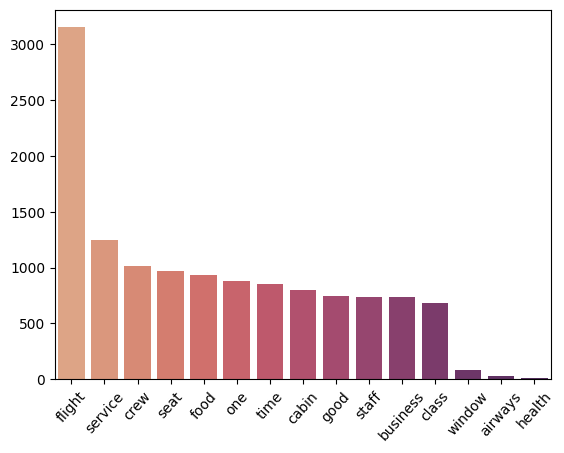

In [72]:
sns.barplot(x = S_dict.keys(),y = S_dict.values(),palette = 'flare')

plt.xticks(rotation=48)
plt.show()